# Toy data: 8 gaussians to 2 moons

In [3]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from DynGenModels.models.mlp import MLP
from DynGenModels.configs.toys_configs import Gauss2MoonsMLPConfig

#...define hyperparameters:

configs = Gauss2moonsMLPConfig(data_name = '8gauss_to_2moons',
                        features = ['x', 'y'],
                        num_samples = 20000,
                        sigma = 0.0,
                        gauss_8_scale = 5,
                        gauss_8_var = 0.1,
                        moon_2_noise = 0.1,
                        data_split_fracs = [0.7, 0.2, 0.1],
                        epochs = 1000,
                        early_stopping=1000,
                        batch_size = 256,
                        warmup_epochs = 50,
                        print_epochs = 100,
                        lr = 1e-4,
                        dim_hidden = 64, 
                        device = 'cpu',
                        solver='dopri5',
                        num_sampling_steps=100,
                        seed = 1234
                        )

#...run experiment:

from DynGenModels.datamodules.toys.datasets import Gauss2MoonsDataset
from DynGenModels.datamodules.toys.dataloader import ToysDataLoader
from DynGenModels.dynamics.flowmatch import SimplifiedCondFlowMatching
from DynGenModels.pipelines.FlowMatchPipeline import FlowMatchPipeline
from DynGenModels.pipelines.utils import RunFlowPipeline

toys = RunFlowPipeline(workdir='../results',
                        dataset=ToysDataset,
                        dataloader=ToysDataLoader,
                        net=MLP,
                        configs=configs,
                        dynamics=SimplifiedCondFlowMatching,
                        pipeline=FlowMatchPipeline
                        )  

#============================================================================
INFO: created directory: ../results/MLP.8gauss_to_2moons_2023.09.26_21h03__1
#============================================================================
+--------------------+------------------+
| Key                | Value            |
+--------------------+------------------+
| data_name          | 8gauss_to_2moons |
| features           | ['x', 'y']       |
| num_samples        | 20000            |
| gauss_8_scale      | 5                |
| gauss_8_var        | 0.1              |
| moon_2_noise       | 0.1              |
| device             | cpu              |
| data_split_fracs   | [0.7, 0.2, 0.1]  |
| batch_size         | 256              |
| epochs             | 1000             |
| early_stopping     | 1000             |
| warmup_epochs      | 50               |
| print_epochs       | 100              |
| lr                 | 0.0001           |
| seed               | 1234             |
| solver   

epochs:   0%|          | 0/1000 [00:00<?, ?it/s]

	 test loss: 0.05998558568954468  (min loss: 0.05998558568954468)
	 test loss: 0.03946152329444885  (min loss: 0.03836706328392029)
	 test loss: 0.0372059166431427  (min loss: 0.03712068200111389)
	 test loss: 0.036698492407798766  (min loss: 0.0357469584941864)
	 test loss: 0.03639638090133667  (min loss: 0.03524422025680542)
	 test loss: 0.035496891736984254  (min loss: 0.03520698082447052)
	 test loss: 0.035569542527198794  (min loss: 0.03484182488918305)
	 test loss: 0.036870359897613524  (min loss: 0.0345397881269455)
	 test loss: 0.03592264103889466  (min loss: 0.0345397881269455)
	 test loss: 0.03611294889450073  (min loss: 0.03444017899036408)


sampling:   0%|          | 0/8 [00:00<?, ?it/s]

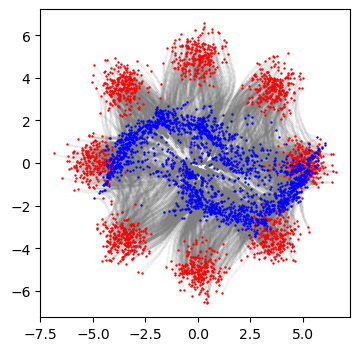

In [4]:
fig, ax = plt.subplots(1,1, figsize=(4,4))
for i in range(configs.num_sampling_steps): 
    plt.scatter(toys.trajectories[i][:,0], toys.trajectories[i][:,1], s=0.05, color='gray', alpha=0.2)
plt.scatter(toys.trajectories[0][:,0], toys.trajectories[0][:,1], s=0.5, color='red')
plt.scatter(toys.trajectories[-1][:,0], toys.trajectories[-1][:,1], s=0.5, color='blue')

plt.show()

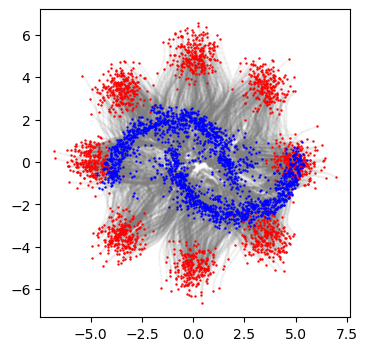

# Deconvolution Flow-Matching

In [1]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from DynGenModels.models.mlp import MLP
from DynGenModels.configs.toys_configs import ToysMLPConfig

#...define hyperparameters:

configs = ToysMLPConfig(data_name = 'smeared_gaussians',
                        features = ['x', 'y'],
                        num_samples = 30000,
                        sigma = 1e-4,
                        noise_cov = [[0.1,0],[0,1]],
                        data_split_fracs = [0.7, 0.1, 0.2],
                        epochs = 200,
                        early_stopping=1000,
                        batch_size = 512,
                        warmup_epochs = 50,
                        print_epochs = 50,
                        lr = 5e-4,
                        dim_hidden = 256, 
                        device = 'cpu',
                        solver='midpoint',
                        num_sampling_steps=200,
                        seed = 12345
                        )

#...run experiment:

from DynGenModels.datamodules.toys.datasets import SmearedGaussDataset
from DynGenModels.datamodules.toys.dataloader import ToysDataLoader
from DynGenModels.dynamics.flowmatch import DeconvolutionFlowMatching
from DynGenModels.pipelines.FlowMatchPipeline import FlowMatchPipeline
from DynGenModels.pipelines.utils import RunFlowPipeline

toys = RunFlowPipeline(workdir='../results',
                        dataset=SmearedGaussDataset,
                        dataloader=ToysDataLoader,
                        net=MLP,
                        configs=configs,
                        dynamics=DeconvolutionFlowMatching,
                        pipeline=FlowMatchPipeline
                        )  

#=============================================================================
INFO: created directory: ../results/MLP.smeared_gaussians_2023.09.27_12h05__1
#=============================================================================
+--------------------+--------------------+
| Key                | Value              |
+--------------------+--------------------+
| data_name          | smeared_gaussians  |
| features           | ['x', 'y']         |
| num_samples        | 30000              |
| gauss_8_scale      | 2                  |
| gauss_8_var        | 0.1                |
| moon_2_noise       | 0.2                |
| noise_cov          | [[0.1, 0], [0, 1]] |
| device             | cpu                |
| data_split_fracs   | [0.7, 0.1, 0.2]    |
| batch_size         | 512                |
| epochs             | 200                |
| early_stopping     | 1000               |
| warmup_epochs      | 50                 |
| print_epochs       | 50                 |
| lr            

epochs:   0%|          | 0/200 [00:00<?, ?it/s]

	 test loss: 0.0009567822913328807  (min loss: 0.0009567822913328807)
	 test loss: 0.0009014101326465607  (min loss: 0.0008706561128298441)
	 test loss: 0.0008602747023105621  (min loss: 0.0008496057788530986)
	 test loss: 0.0008823810517787933  (min loss: 0.0008471259574095409)


sampling:   0%|          | 0/12 [00:00<?, ?it/s]

/Users/dario/anaconda3/lib/python3.10/site-packages/torchdyn/numerics/odeint.py:84: UserWarning: Setting tolerances has no effect on fixed-step methods
  warn("Setting tolerances has no effect on fixed-step methods")


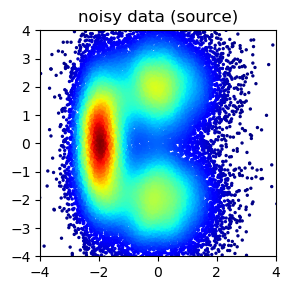

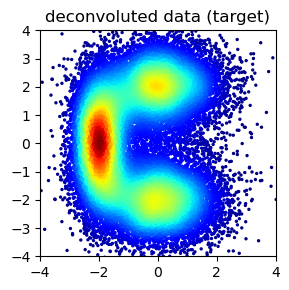

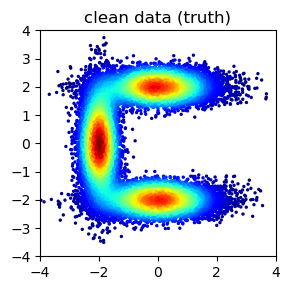

In [3]:
pipeline = FlowMatchPipeline(trained_model=toys.model, config=configs, source_input=toys.dataset.source)
plot_gaussians(toys.dataset.source, title='noisy data (source)')
plot_gaussians(pipeline.target, title='deconvoluted data (target)')
plot_gaussians(toys.dataset.truth, title='clean data (truth)')


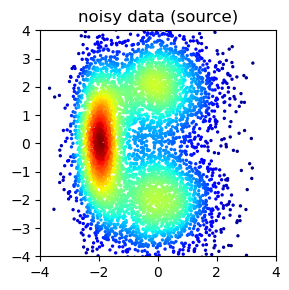

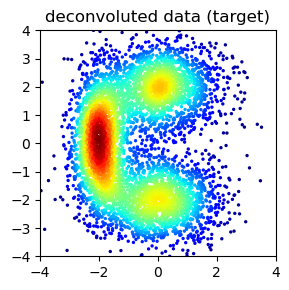

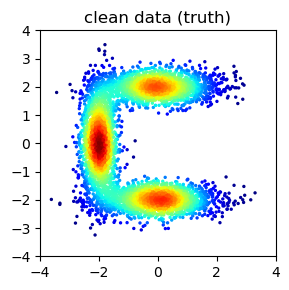

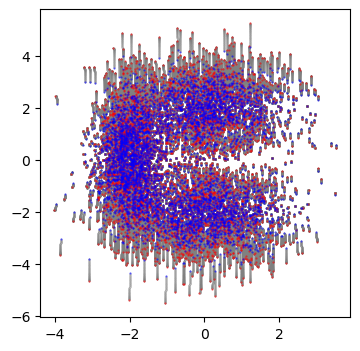

In [2]:
def plot_gaussians(data, num_points=None, title=None):

    import scipy.stats as stats

    fig, ax = plt.subplots(1,1, figsize=(3,3))
    x = data[:num_points,0]
    y = data[:num_points,1]
    z = stats.gaussian_kde(np.vstack([x,y]))(np.vstack([x,y]))
    plt.scatter(x, y, c=z, s=2, cmap='jet')
    plt.xlim(-4,4)
    plt.ylim(-4,4)
    plt.title(title)
    plt.tight_layout()
    plt.show()

#...plot data:
    
plot_gaussians(toys.dataset.source, num_points=6000, title='noisy data (source)')
plot_gaussians(toys.target, title='deconvoluted data (target)')
plot_gaussians(toys.dataset.truth, num_points=6000, title='clean data (truth)')

#...plot trajectories:

fig, ax = plt.subplots(1,1, figsize=(4,4))
for i in range(configs.num_sampling_steps): 
    plt.scatter(toys.trajectories[i][:,0], toys.trajectories[i][:,1], s=0.0225, color='gray', alpha=0.3)
plt.scatter(toys.trajectories[0][:,0], toys.trajectories[0][:,1], s=0.3, color='red', alpha=0.6)
plt.scatter(toys.trajectories[-1][:,0], toys.trajectories[-1][:,1], s=0.3, color='blue', alpha=0.6)
plt.show()


In [ ]:
fig, ax = plt.subplots(1,1, figsize=(4,4))
for i in range(configs.num_sampling_steps): 
    plt.scatter(toys.trajectories[i][:,0], toys.trajectories[i][:,1], s=0.05, color='gray', alpha=0.2)
plt.scatter(toys.trajectories[0][:,0], toys.trajectories[0][:,1], s=0.5, color='red')
plt.scatter(toys.trajectories[-1][:,0], toys.trajectories[-1][:,1], s=0.5, color='blue')

plt.show()

# Deconvolution Normalizing Flows